<a href="https://colab.research.google.com/github/JoDeMiro/TimeSeriesLearn/blob/main/01_TSLearn_Longest_Common_Subsequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline


# Longest Common Subsequence

This example illustrates LCSS computation between time series and plots the
alignment path [1]. and its relationship to the DTW.

Since LCSS focuses on the similar parts between two time-series, a potential
use case is to identify the similarity between time-series whose lengths differ
greatly or have noise. As one example, M. Vlachos et al. [1] used this method
to cluster time series regarding human writing in the presence of noise.

The example demonstrates the use of the functions `lcss_path` and `dtw_path`
to calculate the alignment path between them and compare the two approaches
when dealing with unequal-length sequence data and noise.

[1] M. Vlachos, D. Gunopoulos, and G. Kollios. 2002. "Discovering Similar
Multidimensional Trajectories", In Proceedings of the 18th International
Conference on Data Engineering (ICDE '02). IEEE Computer Society, USA, 673.


In [3]:
!pip install -q tslearn

     |████████████████████████████████| 793 kB 5.2 MB/s 


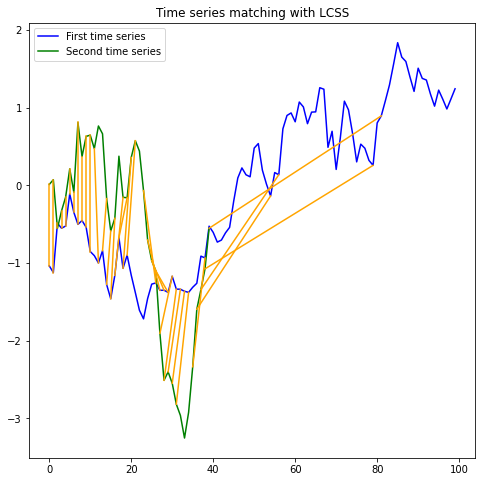

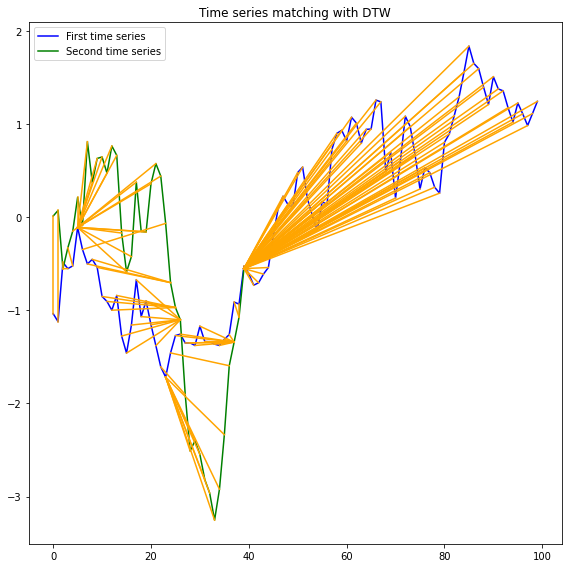

In [4]:
# Author: Daniela Duarte
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn import metrics


numpy.random.seed(0)
n_ts, sz, d = 2, 100, 1
dataset = random_walks(n_ts=n_ts, sz=sz, d=d, random_state=5)
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
dataset_scaled = scaler.fit_transform(dataset)

lcss_path, sim_lcss = metrics.lcss_path(dataset_scaled[0, :, 0], dataset_scaled[1, :40, 0], eps=1.5)
dtw_path, sim_dtw = metrics.dtw_path(dataset_scaled[0, :, 0], dataset_scaled[1, :40, 0])

plt.figure(1, figsize=(8, 8))

plt.plot(dataset_scaled[0, :, 0], "b-", label='First time series')
plt.plot(dataset_scaled[1, :40, 0], "g-", label='Second time series')

for positions in lcss_path:
    plt.plot([positions[0], positions[1]],
             [dataset_scaled[0, positions[0], 0], dataset_scaled[1, positions[1], 0]], color='orange')
plt.legend()
plt.title("Time series matching with LCSS")

plt.figure(2, figsize=(8, 8))
plt.plot(dataset_scaled[0, :, 0], "b-", label='First time series')
plt.plot(dataset_scaled[1, :40, 0], "g-", label='Second time series')

for positions in dtw_path:
    plt.plot([positions[0], positions[1]],
             [dataset_scaled[0, positions[0], 0], dataset_scaled[1, positions[1], 0]], color='orange')

plt.legend()
plt.title("Time series matching with DTW")

plt.tight_layout()
plt.show()